# Pathrise
The aim of this analysis is to predict whether the person entering the company will eventually be hired or not.

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_excel('Data_Pathrise.xlsx')
df.head()

,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,1.0,Active,SWE,OCT19A,NaN,0.0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900.0,Male,Non-Hispanic White or Euro-American
1,2.0,Active,PSO,JAN20A,NaN,0.0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0.0,Male,Non-Hispanic White or Euro-American
2,3.0,Closed Lost,Design,AUG19B,0.0,0.0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0.0,Male,East Asian or Asian American
3,4.0,Closed Lost,PSO,AUG19B,0.0,0.0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25.0,Male,Decline to Self Identify
4,5.0,Placed,SWE,AUG19A,89.0,1.0,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100.0,Male,East Asian or Asian American


# Data Preprocessing

In [4]:
df.drop('id',axis=1,inplace=True)
df.drop('pathrise_status',axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   pathrise_status              2544 non-null   object 
 1   primary_track                2544 non-null   object 
 2   cohort_tag                   2536 non-null   object 
 3   program_duration_days        1928 non-null   float64
 4   placed                       2544 non-null   float64
 5   employment_status            2315 non-null   object 
 6   highest_level_of_education   2486 non-null   object 
 7   length_of_job_search         2470 non-null   object 
 8   biggest_challenge_in_search  2520 non-null   object 
 9   professional_experience      2322 non-null   object 
 10  work_authorization_status    2260 non-null   object 
 11  number_of_interviews         2326 non-null   float64
 12  number_of_applications       2544 non-null   float64
 13  gender            

In [6]:
df.isnull().sum()

pathrise_status                  0
primary_track                    0
cohort_tag                       8
program_duration_days          616
placed                           0
employment_status              229
highest_level_of_education      58
length_of_job_search            74
biggest_challenge_in_search     24
professional_experience        222
work_authorization_status      284
number_of_interviews           218
number_of_applications           0
gender                         492
race                            18
dtype: int64

In [7]:
df['pathrise_status'].value_counts()

Placed                956
Active                532
Withdrawn             398
Withdrawn (Trial)     276
Closed Lost           182
Withdrawn (Failed)     82
MIA                    52
Deferred               34
Break                  32
Name: pathrise_status, dtype: int64

In [8]:
#check the column pathrise_status(Active,Break,MI)
x=len(df[df['pathrise_status']=='Active'])
y=len(df[df['pathrise_status']=='MIA'])
z=len(df[df['pathrise_status']=='Break'])
Sum=x+y+z
Sum

616

In [9]:
df['program_duration_days'].isnull().sum()

616

In [10]:
tags=['Active','MIA','Break']
df_days=df[df['pathrise_status'].isin(tags)]
df_days['pathrise_status'].value_counts()

Active    532
MIA        52
Break      32
Name: pathrise_status, dtype: int64

In [11]:
df_days.shape

(616, 15)

In [12]:
df_days['program_duration_days'].value_counts()

Series([], Name: program_duration_days, dtype: int64)

In [13]:
df.isnull().sum()

pathrise_status                  0
primary_track                    0
cohort_tag                       8
program_duration_days          616
placed                           0
employment_status              229
highest_level_of_education      58
length_of_job_search            74
biggest_challenge_in_search     24
professional_experience        222
work_authorization_status      284
number_of_interviews           218
number_of_applications           0
gender                         492
race                            18
dtype: int64

In [14]:
df.dropna(subset=['program_duration_days'],inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928 entries, 2 to 2543
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   pathrise_status              1928 non-null   object 
 1   primary_track                1928 non-null   object 
 2   cohort_tag                   1922 non-null   object 
 3   program_duration_days        1928 non-null   float64
 4   placed                       1928 non-null   float64
 5   employment_status            1746 non-null   object 
 6   highest_level_of_education   1886 non-null   object 
 7   length_of_job_search         1862 non-null   object 
 8   biggest_challenge_in_search  1908 non-null   object 
 9   professional_experience      1767 non-null   object 
 10  work_authorization_status    1707 non-null   object 
 11  number_of_interviews         1756 non-null   float64
 12  number_of_applications       1928 non-null   float64
 13  gender            

In [17]:
df['program_duration_days'].isnull().sum()

0

In [17]:
df['pathrise_status'].value_counts()

Placed                956
Withdrawn             398
Withdrawn (Trial)     276
Closed Lost           182
Withdrawn (Failed)     82
Deferred               34
Name: pathrise_status, dtype: int64

In [18]:
df

,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
2,Closed Lost,Design,AUG19B,0.0,0.0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0.0,Male,East Asian or Asian American
3,Closed Lost,PSO,AUG19B,0.0,0.0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25.0,Male,Decline to Self Identify
4,Placed,SWE,AUG19A,89.0,1.0,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100.0,Male,East Asian or Asian American
5,Closed Lost,SWE,AUG19A,0.0,0.0,Employed Full-Time,Master's Degree,1-2 months,Technical interviewing,3-4 years,Green Card,5.0,100.0,Male,East Asian or Asian American
6,Closed Lost,SWE,AUG19B,0.0,0.0,Employed Full-Time,Master's Degree,Less than one month,Getting past phone screens,3-4 years,Green Card,0.0,9.0,Male,"Black, Afro-Caribbean, or African American"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2535,Closed Lost,PSO,SEP19B,0.0,0.0,Employed Full-Time,Master's Degree,NaN,Figuring out which jobs to apply for,3-4 years,Citizen,0.0,20.0,NaN,South Asian or Indian American
2538,Withdrawn,SWE,JUL19B,118.0,0.0,Employed Part-Time,Master's Degree,Less than one month,Lack of relevant experience,5+ years,Other,1.0,25.0,Decline to Self Identify,Middle Eastern or Arab American
2539,Withdrawn (Failed),Design,JUN18A,457.0,0.0,Contractor,Master's Degree,6 months to a year,Technical interviewing,5+ years,Citizen,4.0,15.0,Male,Non-Hispanic White or Euro-American
2540,Withdrawn (Failed),Data,JAN19B,488.0,0.0,NaN,Master's Degree,3-5 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,1.0,7.0,Male,Non-Hispanic White or Euro-American


In [19]:
# Reset the index
df.reset_index(drop=True, inplace=True)
df

,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,Closed Lost,Design,AUG19B,0.0,0.0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0.0,Male,East Asian or Asian American
1,Closed Lost,PSO,AUG19B,0.0,0.0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25.0,Male,Decline to Self Identify
2,Placed,SWE,AUG19A,89.0,1.0,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100.0,Male,East Asian or Asian American
3,Closed Lost,SWE,AUG19A,0.0,0.0,Employed Full-Time,Master's Degree,1-2 months,Technical interviewing,3-4 years,Green Card,5.0,100.0,Male,East Asian or Asian American
4,Closed Lost,SWE,AUG19B,0.0,0.0,Employed Full-Time,Master's Degree,Less than one month,Getting past phone screens,3-4 years,Green Card,0.0,9.0,Male,"Black, Afro-Caribbean, or African American"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1923,Closed Lost,PSO,SEP19B,0.0,0.0,Employed Full-Time,Master's Degree,NaN,Figuring out which jobs to apply for,3-4 years,Citizen,0.0,20.0,NaN,South Asian or Indian American
1924,Withdrawn,SWE,JUL19B,118.0,0.0,Employed Part-Time,Master's Degree,Less than one month,Lack of relevant experience,5+ years,Other,1.0,25.0,Decline to Self Identify,Middle Eastern or Arab American
1925,Withdrawn (Failed),Design,JUN18A,457.0,0.0,Contractor,Master's Degree,6 months to a year,Technical interviewing,5+ years,Citizen,4.0,15.0,Male,Non-Hispanic White or Euro-American
1926,Withdrawn (Failed),Data,JAN19B,488.0,0.0,NaN,Master's Degree,3-5 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,1.0,7.0,Male,Non-Hispanic White or Euro-American


In [20]:
df.columns=df.columns.str.strip()

In [21]:
df.columns

Index(['pathrise_status', 'primary_track', 'cohort_tag',
       'program_duration_days', 'placed', 'employment_status',
       'highest_level_of_education', 'length_of_job_search',
       'biggest_challenge_in_search', 'professional_experience',
       'work_authorization_status', 'number_of_interviews',
       'number_of_applications', 'gender', 'race'],
      dtype='object')

# Exploratory Data Analysis

# check categorize columns

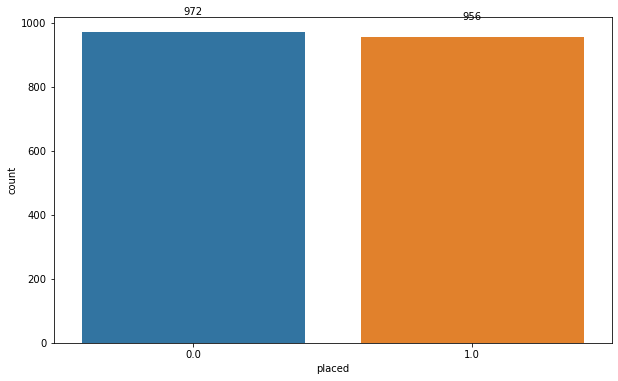

In [22]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.countplot(x="placed", data=df)

for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center', xytext = (0, 20), textcoords = 'offset points')#???

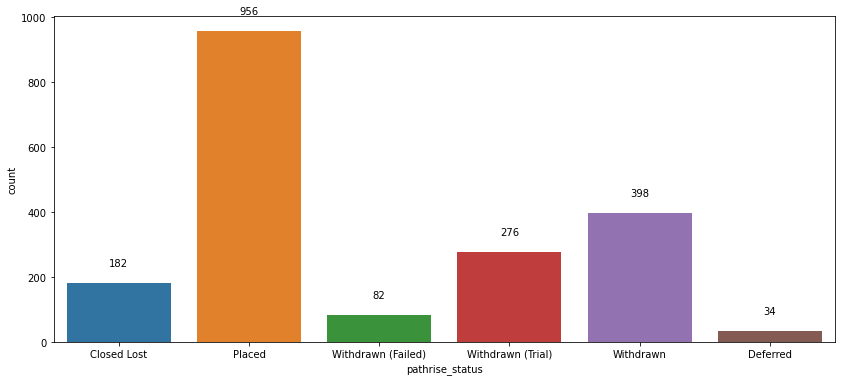

In [23]:
fig, ax = plt.subplots(figsize=(14,6))
ax = sns.countplot(x="pathrise_status", data=df)

for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center', xytext = (0, 20), textcoords = 'offset points')

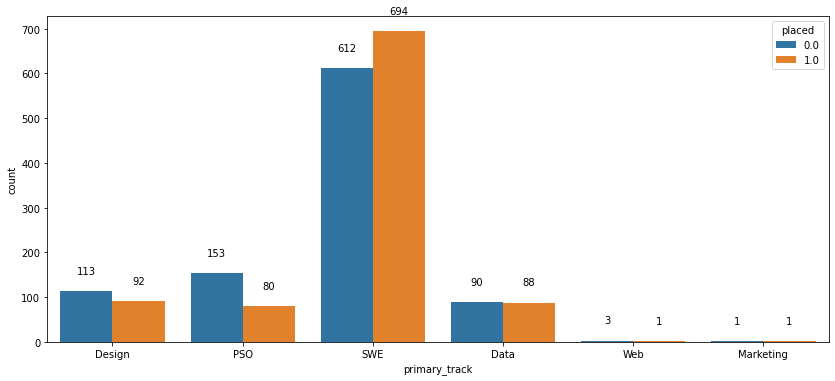

In [24]:
fig, ax = plt.subplots(figsize=(14,6))
ax = sns.countplot(x="primary_track", data=df , hue='placed')

for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center', xytext = (0, 20), textcoords = 'offset points')

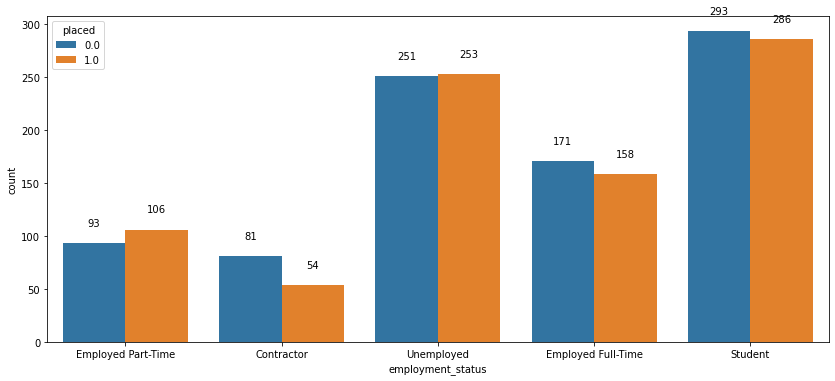

In [25]:
fig, ax = plt.subplots(figsize=(14,6))
ax = sns.countplot(x='employment_status', data=df , hue='placed')

for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center', xytext = (0, 20), textcoords = 'offset points')

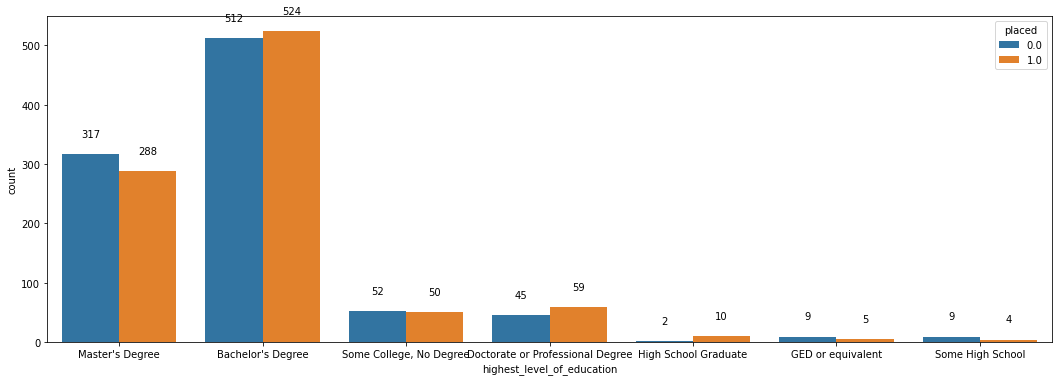

In [26]:
fig, ax = plt.subplots(figsize=(18,6))
ax = sns.countplot(x='highest_level_of_education', data=df , hue='placed')

for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center', xytext = (0, 20), textcoords = 'offset points')

In [27]:
df['biggest_challenge_in_search'].isnull().sum()

20

In [28]:
df['biggest_challenge_in_search'].value_counts()

Hearing back on my applications         737
Getting past final round interviews     234
Technical interviewing                  224
Lack of relevant experience             175
Getting past mid-stage interviews       160
Getting past phone screens              148
Figuring out which jobs to apply for    131
Behavioral interviewing                  43
Resume gap                               30
Technical skills                         26
Name: biggest_challenge_in_search, dtype: int64

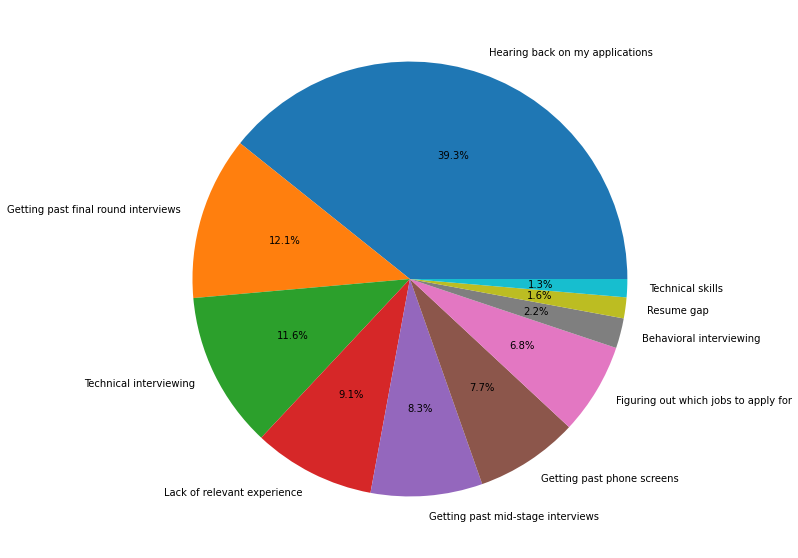

In [29]:
# Fill missing values with a specific label
#Replace missing values with most frequent

df['biggest_challenge_in_search'].fillna('Hearing back on my applications', inplace=True)

# Get the count of each category
counts = df['biggest_challenge_in_search'].value_counts()

# Create a new figure with a specified size (width, height) in inches
plt.figure(figsize=(10, 10))

# Create a pie chart
plt.pie(counts, labels = counts.index, autopct='%1.1f%%')

# Display the plot
plt.show()

In [30]:
df['biggest_challenge_in_search'].isnull().sum()

0

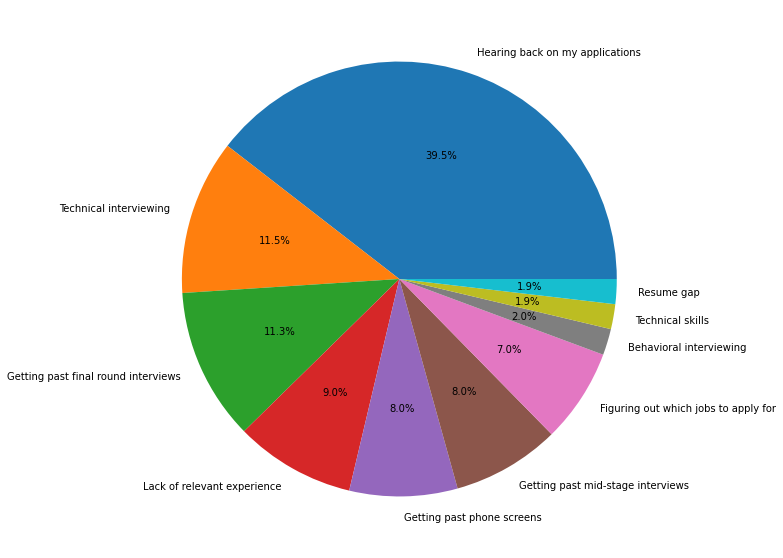

In [31]:
df_failed=df[df['placed']==0]
df_success=df[df['placed']==1]

#Get the count of each category
counts = df_failed['biggest_challenge_in_search'].value_counts()

# Create a new figure with a specified size (width, height) in inches
plt.figure(figsize=(10, 10))

# Create a pie chart
plt.pie(counts, labels = counts.index, autopct='%1.1f%%')

# Display the plot
plt.show()

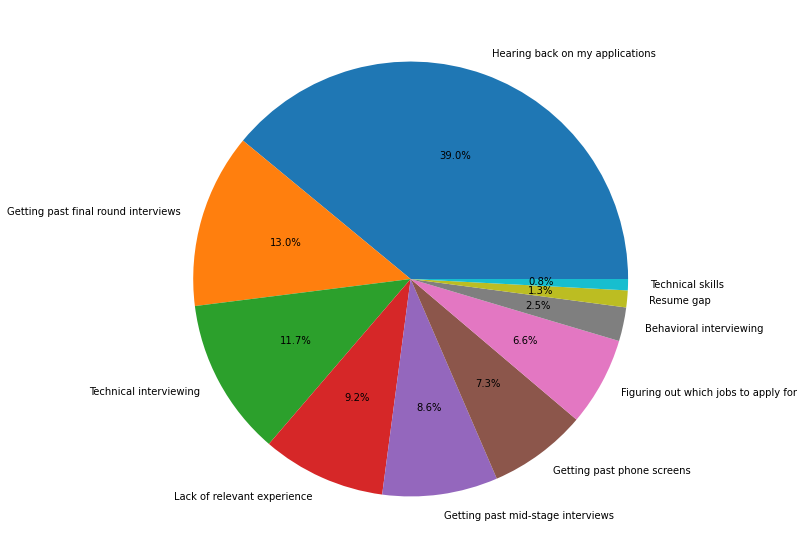

In [32]:
# Get the count of each category
counts = df_success['biggest_challenge_in_search'].value_counts()

# Create a new figure with a specified size (width, height) in inches
plt.figure(figsize=(10, 10))

# Create a pie chart
plt.pie(counts, labels = counts.index, autopct='%1.1f%%')

# Display the plot
plt.show()

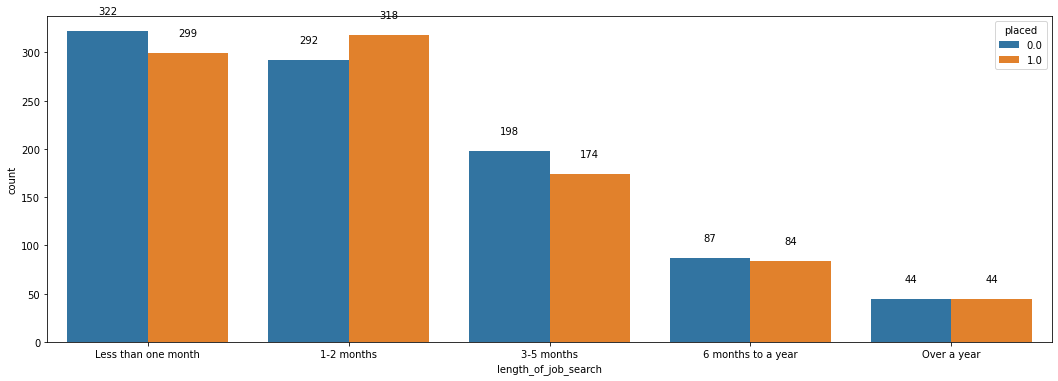

In [33]:
fig, ax = plt.subplots(figsize=(18,6))
ax = sns.countplot(x='length_of_job_search', data=df , hue='placed')

for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center', xytext = (0, 20), textcoords = 'offset points')

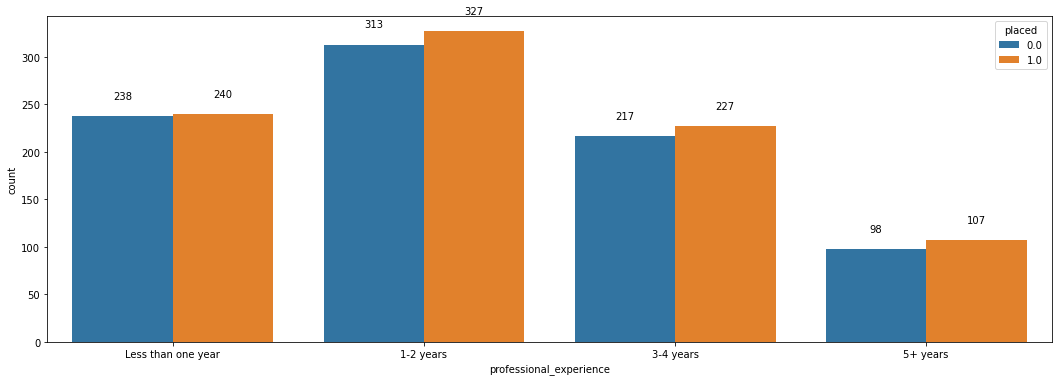

In [34]:
fig, ax = plt.subplots(figsize=(18,6))
ax = sns.countplot(x='professional_experience', data=df , hue='placed')

for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center', xytext = (0, 20), textcoords = 'offset points')

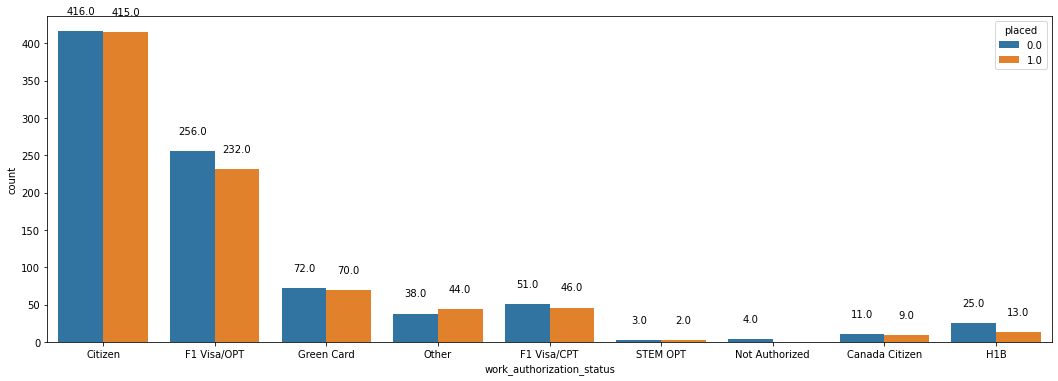

In [35]:
fig, ax = plt.subplots(figsize=(18,6))
ax = sns.countplot(x='work_authorization_status', data=df , hue='placed')

for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center', xytext = (0, 20), textcoords = 'offset points')

In [36]:
df['work_authorization_status'].value_counts()

Citizen           831
F1 Visa/OPT       488
Green Card        142
F1 Visa/CPT        97
Other              82
H1B                38
Canada Citizen     20
STEM OPT            5
Not Authorized      4
Name: work_authorization_status, dtype: int64

In [37]:
df['employment_status'].value_counts()

Student               579
Unemployed            504
Employed Full-Time    329
Employed Part-Time    199
Contractor            135
Name: employment_status, dtype: int64

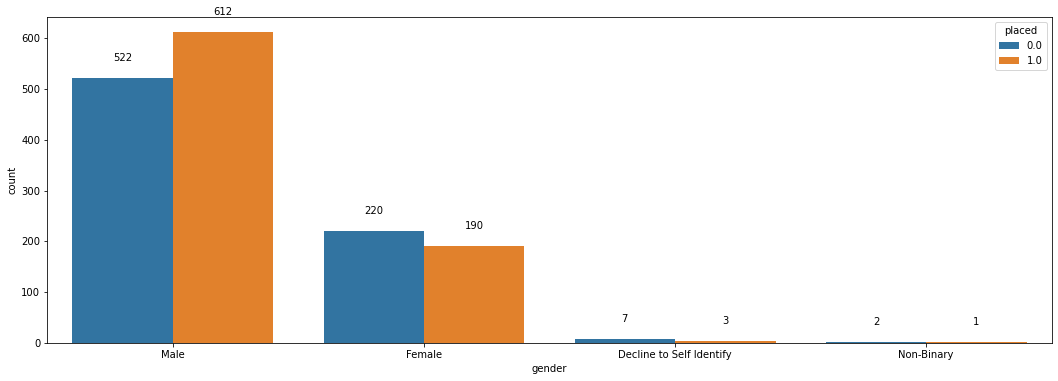

In [38]:
fig, ax = plt.subplots(figsize=(18,6))
ax = sns.countplot(x='gender', data=df , hue='placed')

for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center', xytext = (0, 20), textcoords = 'offset points')

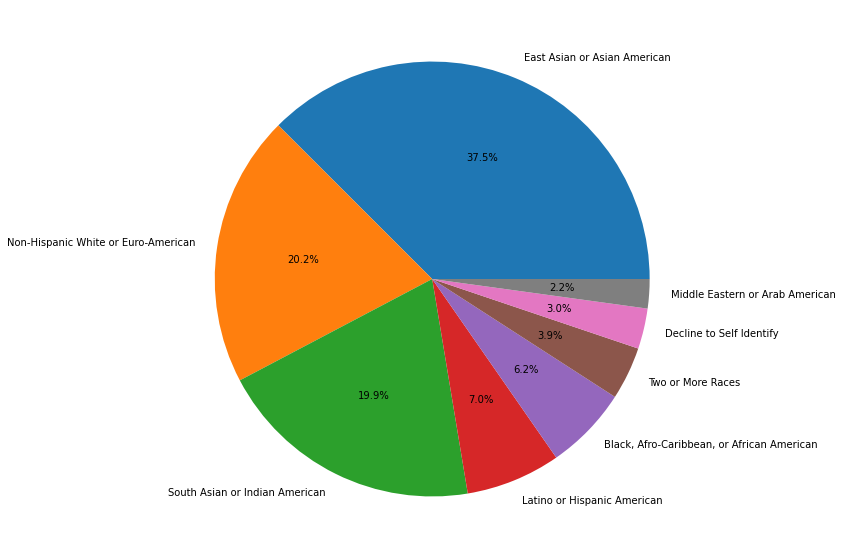

In [39]:
#Get the count of each category
counts = df_failed['race'].value_counts()

# Create a new figure with a specified size (width, height) in inches
plt.figure(figsize=(10, 10))

# Create a pie chart
plt.pie(counts, labels = counts.index, autopct='%1.1f%%')

# Display the plot
plt.show()

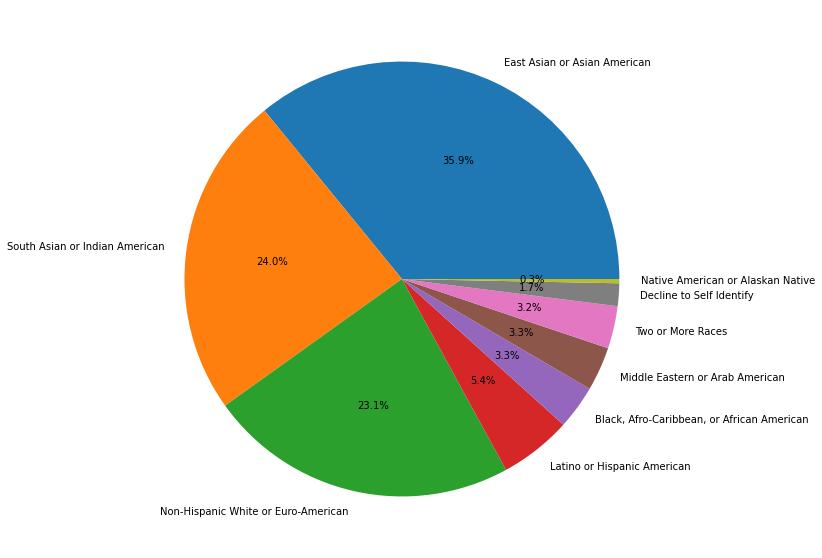

In [40]:
#Get the count of each category
counts = df_success['race'].value_counts()

# Create a new figure with a specified size (width, height) in inches
plt.figure(figsize=(10, 10))

# Create a pie chart
plt.pie(counts, labels = counts.index, autopct='%1.1f%%')

# Display the plot
plt.show()

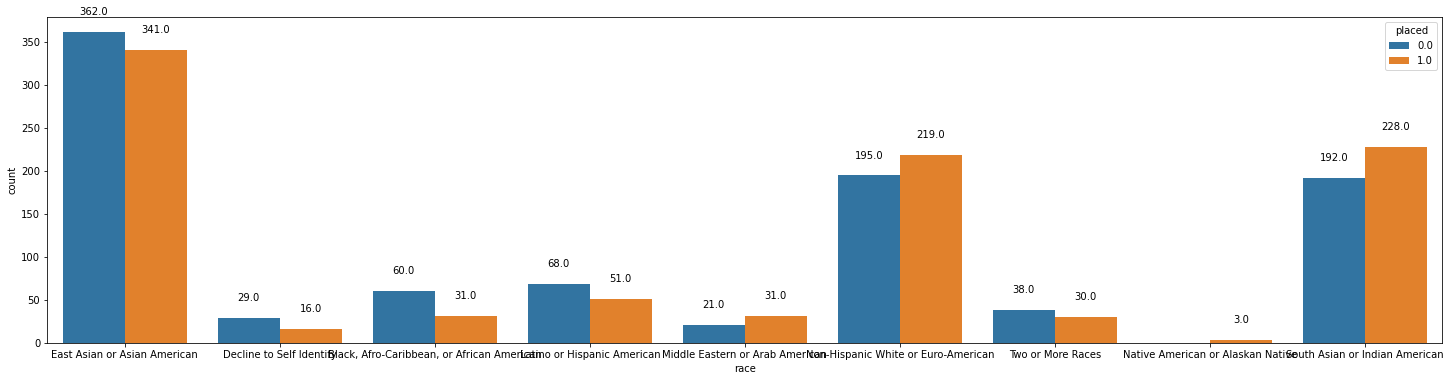

In [41]:
fig, ax = plt.subplots(figsize=(25,6))
ax = sns.countplot(x='race', data=df , hue='placed')

for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center', xytext = (0, 20), textcoords = 'offset points')

# Check numerical columns

In [42]:
df_num=df[['program_duration_days','number_of_interviews','number_of_applications','placed']]
print(df_num.info())
print(df_num.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1928 entries, 0 to 1927
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   program_duration_days   1928 non-null   float64
 1   number_of_interviews    1756 non-null   float64
 2   number_of_applications  1928 non-null   float64
 3   placed                  1928 non-null   float64
dtypes: float64(4)
memory usage: 60.4 KB
None
program_duration_days       0
number_of_interviews      172
number_of_applications      0
placed                      0
dtype: int64


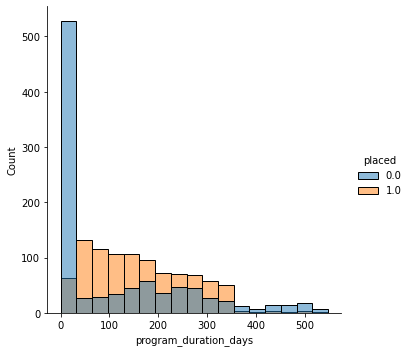

In [43]:
sns.displot(x='program_duration_days', data=df_num, hue='placed')

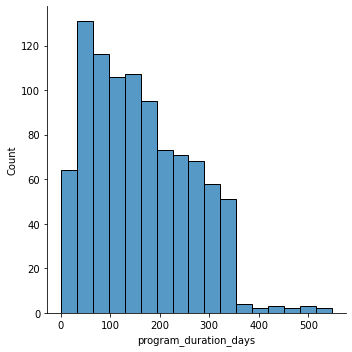

In [44]:
sns.displot(x='program_duration_days', data=df_success)

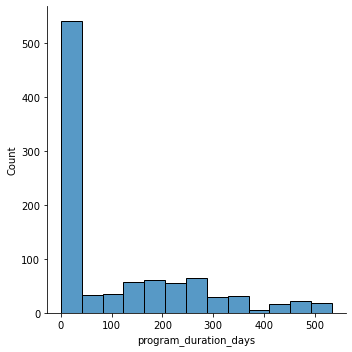

In [45]:
sns.displot(x='program_duration_days', data=df_failed)

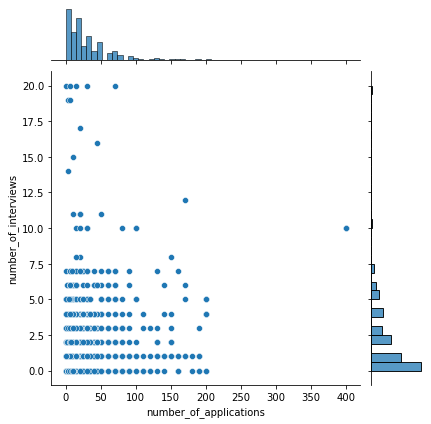

In [46]:
sns.jointplot(x='number_of_applications',y='number_of_interviews',data=df_success,kind='scatter')#????

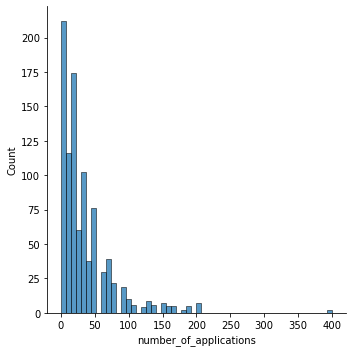

In [47]:
sns.displot(x='number_of_applications', data=df_success)

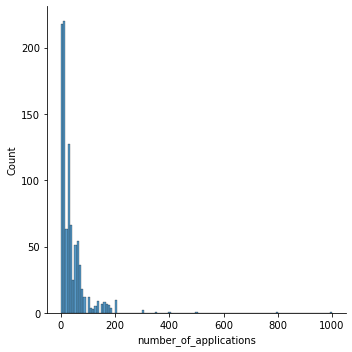

In [48]:
sns.displot(x='number_of_applications', data=df_failed)

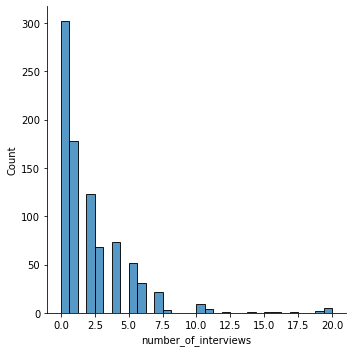

In [49]:
sns.displot(x='number_of_interviews', data=df_success)

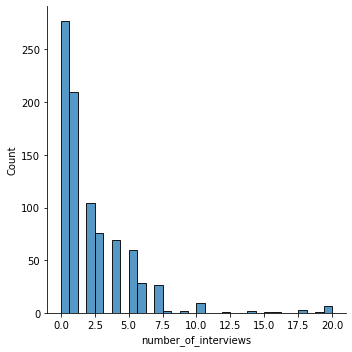

In [50]:
sns.displot(x='number_of_interviews', data=df_failed)

# Remove outliers

<AxesSubplot:xlabel='program_duration_days'>

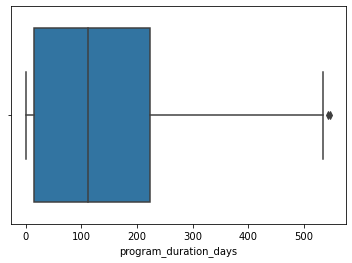

In [51]:
sns.boxplot(x='program_duration_days', data=df)

In [52]:
from scipy import stats

# Assuming 'df' is your DataFrame and 'column1' is the column from which you want to remove outliers
Q1 = df['program_duration_days'].quantile(0.25)
Q3 = df['program_duration_days'].quantile(0.75)
IQR = Q3 - Q1

# Get a boolean mask for outliers
outliers = (df['program_duration_days'] < (Q1 - 1.5 * IQR)) | (df['program_duration_days'] > (Q3 + 1.5 * IQR))

# Remove outliers
df= df[~outliers]

<AxesSubplot:xlabel='program_duration_days'>

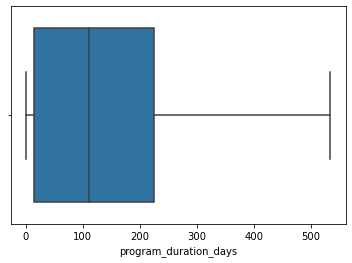

In [53]:
sns.boxplot(x='program_duration_days', data=df)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1926 entries, 0 to 1927
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   pathrise_status              1926 non-null   object 
 1   primary_track                1926 non-null   object 
 2   cohort_tag                   1920 non-null   object 
 3   program_duration_days        1926 non-null   float64
 4   placed                       1926 non-null   float64
 5   employment_status            1744 non-null   object 
 6   highest_level_of_education   1884 non-null   object 
 7   length_of_job_search         1860 non-null   object 
 8   biggest_challenge_in_search  1926 non-null   object 
 9   professional_experience      1765 non-null   object 
 10  work_authorization_status    1705 non-null   object 
 11  number_of_interviews         1754 non-null   float64
 12  number_of_applications       1926 non-null   float64
 13  gender            

<AxesSubplot:xlabel='number_of_applications'>

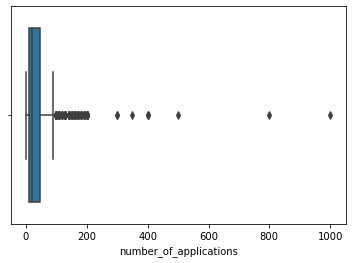

In [55]:
sns.boxplot(x='number_of_applications', data=df)

In [56]:
from scipy import stats

# Assuming 'df' is your DataFrame and 'column1' is the column from which you want to remove outliers
Q1 = df['number_of_applications'].quantile(0.25)
Q3 = df['number_of_applications'].quantile(0.75)
IQR = Q3 - Q1

# Get a boolean mask for outliers
outliers = (df['number_of_applications'] < (Q1 - 1.5 * IQR)) | (df['number_of_applications'] > (Q3 + 1.5 * IQR))

# Remove outliers
df= df[~outliers]

<AxesSubplot:xlabel='number_of_applications'>

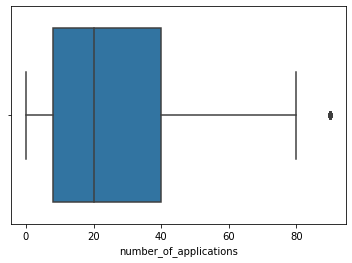

In [57]:
sns.boxplot(x='number_of_applications', data=df)

In [58]:
from scipy import stats

# Assuming 'df' is your DataFrame and 'column1' is the column from which you want to remove outliers
Q1 = df['number_of_applications'].quantile(0.25)
Q3 = df['number_of_applications'].quantile(0.75)
IQR = Q3 - Q1

# Get a boolean mask for outliers
outliers = (df['number_of_applications'] < (Q1 - 1.5 * IQR)) | (df['number_of_applications'] > (Q3 + 1.5 * IQR))

# Remove outliers
df= df[~outliers]

<AxesSubplot:xlabel='number_of_applications'>

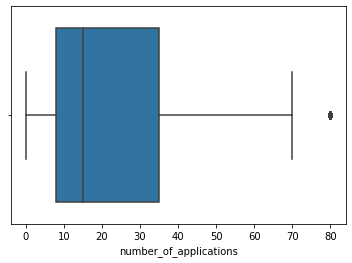

In [59]:
sns.boxplot(x='number_of_applications', data=df)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1745 entries, 0 to 1927
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   pathrise_status              1745 non-null   object 
 1   primary_track                1745 non-null   object 
 2   cohort_tag                   1739 non-null   object 
 3   program_duration_days        1745 non-null   float64
 4   placed                       1745 non-null   float64
 5   employment_status            1575 non-null   object 
 6   highest_level_of_education   1707 non-null   object 
 7   length_of_job_search         1681 non-null   object 
 8   biggest_challenge_in_search  1745 non-null   object 
 9   professional_experience      1596 non-null   object 
 10  work_authorization_status    1538 non-null   object 
 11  number_of_interviews         1590 non-null   float64
 12  number_of_applications       1745 non-null   float64
 13  gender            

<AxesSubplot:xlabel='number_of_interviews'>

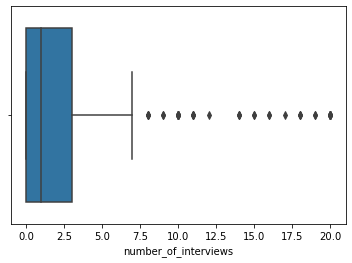

In [61]:
sns.boxplot(x='number_of_interviews', data=df)

In [62]:
from scipy import stats

# Assuming 'df' is your DataFrame and 'column1' is the column from which you want to remove outliers
Q1 = df['number_of_interviews'].quantile(0.25)
Q3 = df['number_of_interviews'].quantile(0.75)
IQR = Q3 - Q1

# Get a boolean mask for outliers
outliers = (df['number_of_interviews'] < (Q1 - 1.5 * IQR)) | (df['number_of_interviews'] > (Q3 + 1.5 * IQR))

# Remove outliers
df= df[~outliers]

<AxesSubplot:xlabel='number_of_interviews'>

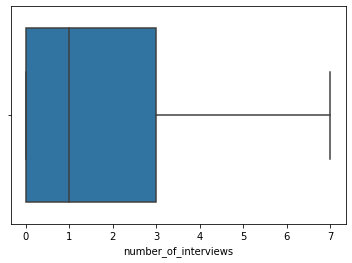

In [63]:
sns.boxplot(x='number_of_interviews', data=df)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1701 entries, 0 to 1927
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   pathrise_status              1701 non-null   object 
 1   primary_track                1701 non-null   object 
 2   cohort_tag                   1695 non-null   object 
 3   program_duration_days        1701 non-null   float64
 4   placed                       1701 non-null   float64
 5   employment_status            1534 non-null   object 
 6   highest_level_of_education   1664 non-null   object 
 7   length_of_job_search         1637 non-null   object 
 8   biggest_challenge_in_search  1701 non-null   object 
 9   professional_experience      1555 non-null   object 
 10  work_authorization_status    1496 non-null   object 
 11  number_of_interviews         1546 non-null   float64
 12  number_of_applications       1701 non-null   float64
 13  gender            

# missing value

In [65]:
df.isnull().sum()

pathrise_status                  0
primary_track                    0
cohort_tag                       6
program_duration_days            0
placed                           0
employment_status              167
highest_level_of_education      37
length_of_job_search            64
biggest_challenge_in_search      0
professional_experience        146
work_authorization_status      205
number_of_interviews           155
number_of_applications           0
gender                         329
race                            10
dtype: int64

In [66]:
df['cohort_tag'].value_counts()

JAN19A    101
DEC18A     89
JAN20A     75
OCT18B     66
OCT18A     62
JAN19B     52
AUG19C     50
JAN20B     47
MAR19A     47
JUN19B     46
FEB20A     45
FEB19A     45
AUG19B     44
JUL19A     42
NOV18A     42
OCT19A     42
AUG18A     41
SEP19B     41
SEP18C     41
NOV19A     40
APR19A     38
SEP19A     38
SEP18B     36
OCT19B     36
AUG19A     35
SEP18A     35
FEB19B     34
DEC19A     33
JUN18A     32
JUN19A     31
MAR19B     30
JUL19B     29
APR19B     27
FEB18A     27
MAR18A     25
APR18B     24
NOV19B     23
MAY18A     22
APR18A     16
FEB20B     16
MAY19B     15
MAY19A     13
MAR20A      7
JAN18A      6
APR20A      5
OCT21A      2
FEB20a      2
Name: cohort_tag, dtype: int64

In [67]:
df['cohort_tag'].replace(np.nan,'JAN19A',inplace=True)

In [68]:
df['cohort_tag'].isnull().sum()

0

In [69]:
df['employment_status'].value_counts()

Student               512
Unemployed            437
Employed Full-Time    288
Employed Part-Time    175
Contractor            122
Name: employment_status, dtype: int64

In [70]:
df['employment_status'].fillna(df['employment_status'].mode()[0],inplace=True)

In [71]:
print(df['employment_status'].value_counts())
print(df['cohort_tag'].isnull().sum())

Student               679
Unemployed            437
Employed Full-Time    288
Employed Part-Time    175
Contractor            122
Name: employment_status, dtype: int64
0


In [72]:
df['highest_level_of_education'].fillna(df['highest_level_of_education'].mode()[0],inplace=True)

In [73]:
df['length_of_job_search'].fillna(df['length_of_job_search'].mode()[0],inplace=True)

In [74]:
df['professional_experience'].fillna(df['professional_experience'].mode()[0],inplace=True)

In [75]:
df['work_authorization_status'].fillna('missing',inplace=True)

In [76]:
df['number_of_interviews'].fillna(df['number_of_interviews'].mean(),inplace=True)

In [77]:
df['gender'].fillna(df['gender'].mode()[0],inplace=True)

In [78]:
df['race'].fillna(df['race'].mode()[0],inplace=True)

In [79]:
df.isnull().sum()

pathrise_status                0
primary_track                  0
cohort_tag                     0
program_duration_days          0
placed                         0
employment_status              0
highest_level_of_education     0
length_of_job_search           0
biggest_challenge_in_search    0
professional_experience        0
work_authorization_status      0
number_of_interviews           0
number_of_applications         0
gender                         0
race                           0
dtype: int64

# Check correlation

In [80]:
df.columns

Index(['pathrise_status', 'primary_track', 'cohort_tag',
       'program_duration_days', 'placed', 'employment_status',
       'highest_level_of_education', 'length_of_job_search',
       'biggest_challenge_in_search', 'professional_experience',
       'work_authorization_status', 'number_of_interviews',
       'number_of_applications', 'gender', 'race'],
      dtype='object')

In [81]:
# Extract the required columns
column1 = pd.to_numeric(df['gender'], errors='coerce')
target_column = df['placed']

# Calculate the correlation coefficient
correlation = column1.corr(target_column)

print("Correlation coefficient:", correlation)#???

Correlation coefficient: nan


In [82]:
# Extract the required columns
#column1 = pd.to_numeric(df['length_of_job_search'], errors='coerce')
column1 =df['number_of_interviews']
target_column = df['placed']

# Calculate the correlation coefficient
correlation = column1.corr(target_column)

print("Correlation coefficient:", correlation)

Correlation coefficient: -0.013366403538921724


In [83]:
column1 =df['number_of_applications']
target_column = df['placed']

# Calculate the correlation coefficient
correlation = column1.corr(target_column)

print("Correlation coefficient:", correlation)

Correlation coefficient: -0.015303062262369762


In [84]:
column1 =df['program_duration_days']
target_column = df['placed']

# Calculate the correlation coefficient
correlation = column1.corr(target_column)

print("Correlation coefficient:", correlation)

Correlation coefficient: 0.18889719045351486


# cohort_tag

In [85]:
df['cohort_tag'].unique()

array(['AUG19B', 'AUG19A', 'SEP19A', 'AUG19C', 'OCT19A', 'NOV19A',
       'NOV19B', 'JAN20A', 'JAN20B', 'DEC19A', 'JUL19B', 'APR20A',
       'OCT18A', 'SEP18C', 'OCT18B', 'JAN19A', 'MAR19A', 'FEB19A',
       'FEB19B', 'APR19A', 'AUG18A', 'DEC18A', 'MAR19B', 'JAN19B',
       'JUN19B', 'SEP18B', 'NOV18A', 'SEP18A', 'APR19B', 'MAY19A',
       'JUL19A', 'FEB18A', 'JUN18A', 'MAR18A', 'APR18A', 'APR18B',
       'MAY18A', 'OCT21A', 'JUN19A', 'SEP19B', 'MAY19B', 'FEB20B',
       'OCT19B', 'FEB20A', 'MAR20A', 'JAN18A', 'FEB20a'], dtype=object)

In [86]:
#df18_failed=df_failed[df_failed['cohort_tag']==('DEC18A','OCT18B','OCT18A','NOV18A','SEP18B','SEP18C','JUN18A','SEP18A','AUG18A','MAY18A','APR18B','FEB18A','APR18A','MAR18A','JAN18A')]
tags = ['DEC18A', 'OCT18B', 'OCT18A', 'NOV18A', 'SEP18B', 'SEP18C', 'JUN18A', 'SEP18A', 'AUG18A', 'MAY18A', 'APR18B', 'FEB18A', 'APR18A', 'MAR18A', 'JAN18A']
df18= df[df['cohort_tag'].isin(tags)]
print(len(df18))

564


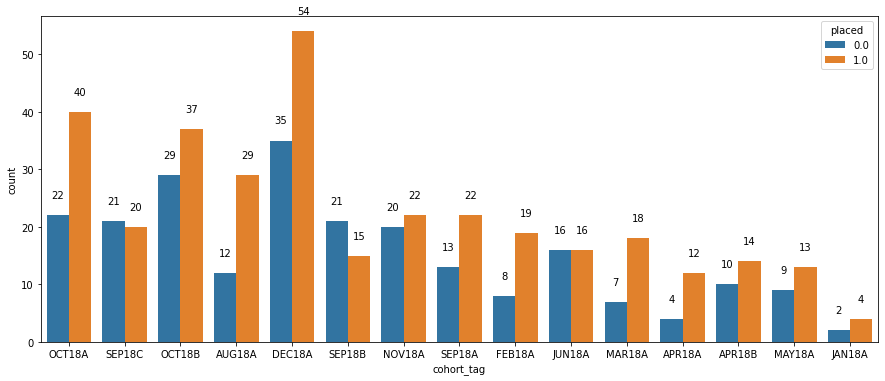

In [87]:
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.countplot(x="cohort_tag", data=df18 ,hue='placed')

for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center', xytext = (0, 20), textcoords = 'offset points')

In [88]:
tags=['JAN19A','AUG19C','AUG19B','DEC19A','SEP19B','NOV19A','SEP19A','MAR19A','JAN19B','OCT19A','JUL19A','JUN19B','AUG19A','OCT19B','JUN19A','NOV19B','FEB19A','JUL19B','MAR19B','FEB19B','APR19B','APR19A','MAY19A','MAY19B']
df19= df[df['cohort_tag'].isin(tags)]
print(len(df19))

938


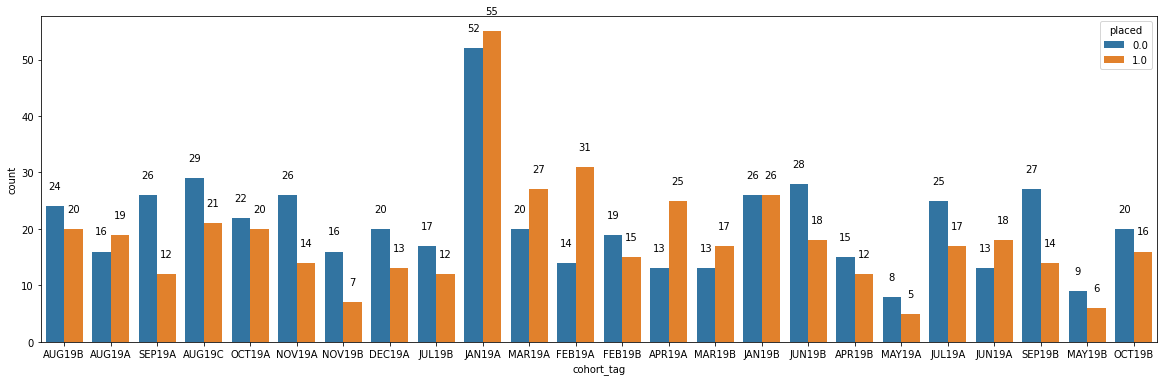

In [89]:
fig, ax = plt.subplots(figsize=(20,6))
ax = sns.countplot(x="cohort_tag", data=df19 ,hue='placed')

for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center', xytext = (0, 20), textcoords = 'offset points')

In [90]:
tags=['JAN20A','FEB20A','JAN20B','FEB20B','MAR20A','APR20A','FEB20a']
df20=df[df['cohort_tag'].isin(tags)]
print(len(df20))

197


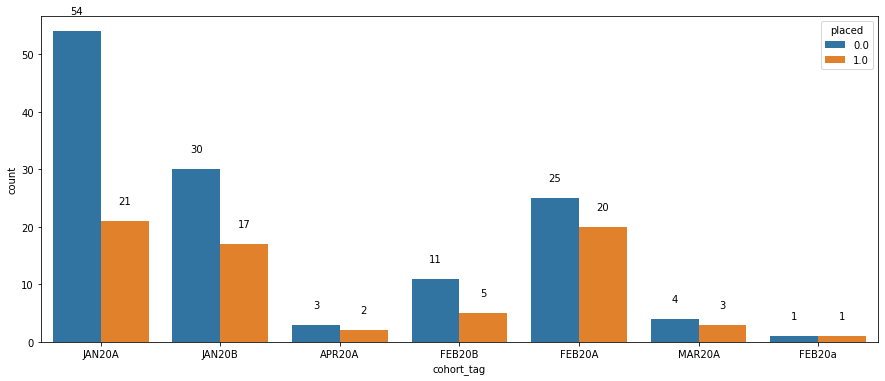

In [91]:
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.countplot(x="cohort_tag", data=df20 ,hue='placed')

for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center', xytext = (0, 20), textcoords = 'offset points')

In [92]:
tags=['OCT21A']
df21=df[df['cohort_tag'].isin(tags)]

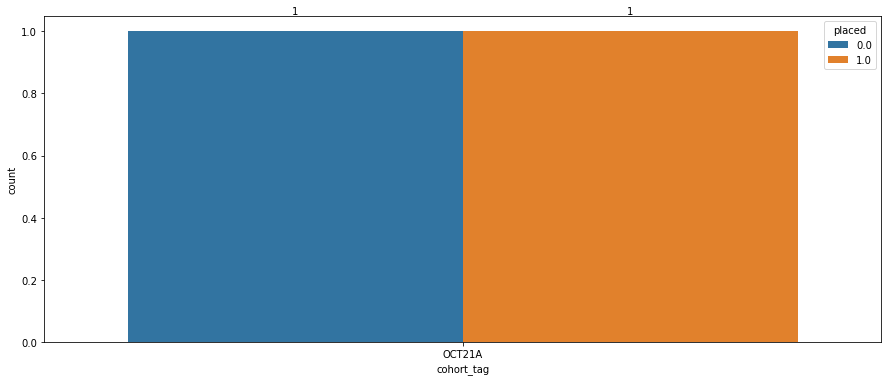

In [93]:
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.countplot(x="cohort_tag", data=df21 ,hue='placed')

for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center', xytext = (0, 20), textcoords = 'offset points')

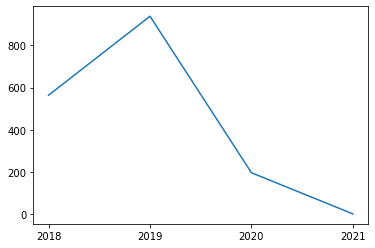

In [94]:
df2018=len(df18)
df2019=len(df19)
df2020=len(df20)
df2021=len(df21)

x=['2018','2019','2020','2021']
y=[df2018,df2019,df2020,df2021]

plt.plot(x,y)


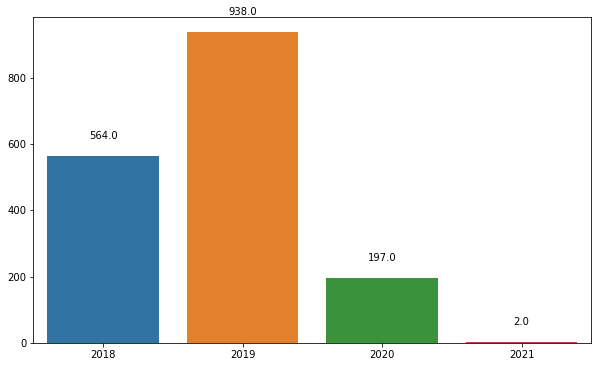

In [95]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create the countplot
sns.barplot(x=x, y=y, ax=ax)

# Annotate the count values on the plot
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 20), textcoords='offset points')

# Display the plot
plt.show()#19FEB=corona

# Get dummies

In [96]:
df.columns

Index(['pathrise_status', 'primary_track', 'cohort_tag',
       'program_duration_days', 'placed', 'employment_status',
       'highest_level_of_education', 'length_of_job_search',
       'biggest_challenge_in_search', 'professional_experience',
       'work_authorization_status', 'number_of_interviews',
       'number_of_applications', 'gender', 'race'],
      dtype='object')

In [97]:
Pathrise_status=pd.get_dummies(df['pathrise_status'],drop_first=True)
Primary_track=pd.get_dummies(df['primary_track'],drop_first=True)
Cohort_tag=pd.get_dummies(df['cohort_tag'],drop_first=True)
Employment_status= pd.get_dummies(df['employment_status'],drop_first=True)
Highest_level_of_education=pd.get_dummies(df['highest_level_of_education'],drop_first=True)
Length_of_job_search=pd.get_dummies(df['length_of_job_search'],drop_first=True)
Biggest_challenge_in_search=pd.get_dummies(df['biggest_challenge_in_search'],drop_first=True)
Professional_experience=pd.get_dummies(df['professional_experience'],drop_first=True)
Work_authorization_status=pd.get_dummies(df['work_authorization_status'],drop_first=True)
Gender=pd.get_dummies(df['gender'],drop_first=True)
Race=pd.get_dummies(df['race'],drop_first=True)

In [98]:
df.drop(['pathrise_status','primary_track','cohort_tag','employment_status','highest_level_of_education','length_of_job_search','biggest_challenge_in_search','professional_experience','work_authorization_status','gender','race'],axis=1,inplace=True)

In [99]:
df=pd.concat([Pathrise_status,Primary_track,Cohort_tag,Employment_status,Highest_level_of_education,Length_of_job_search,Biggest_challenge_in_search,Professional_experience,Work_authorization_status,Gender,Race,df],axis=1)

df.head()

,Deferred,Placed,Withdrawn,Withdrawn (Failed),Withdrawn (Trial),Design,Marketing,PSO,SWE,Web,...,Latino or Hispanic American,Middle Eastern or Arab American,Native American or Alaskan Native,Non-Hispanic White or Euro-American,South Asian or Indian American,Two or More Races,program_duration_days,placed,number_of_interviews,number_of_applications
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0.0,0.0,5.0,25.0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0.0,0.0,0.0,9.0
5,0,0,0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,19.0,0.0,4.0,15.0
6,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,13.0,0.0,0.0,10.0


In [100]:
column1 =df['Placed']
target_column = df['placed']

# Calculate the correlation coefficient
correlation = column1.corr(target_column)

print("Correlation coefficient:", correlation)

Correlation coefficient: 1.0


In [101]:
df.drop('Placed',axis=1,inplace=True)
df.head()

,Deferred,Withdrawn,Withdrawn (Failed),Withdrawn (Trial),Design,Marketing,PSO,SWE,Web,APR18B,...,Latino or Hispanic American,Middle Eastern or Arab American,Native American or Alaskan Native,Non-Hispanic White or Euro-American,South Asian or Indian American,Two or More Races,program_duration_days,placed,number_of_interviews,number_of_applications
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0.0,0.0,5.0,25.0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,9.0
5,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,19.0,0.0,4.0,15.0
6,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,13.0,0.0,0.0,10.0


# Standardize Features

In [102]:
def plot_confusion_matrix(y_test,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y_test,y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not placed', 'placed']); ax.yaxis.set_ticklabels(['did not placed', 'placed'])

In [103]:
from sklearn import preprocessing

y=df['placed']
x=df.drop('placed',axis=1)
transform=preprocessing.StandardScaler()
x_scaled=transform.fit_transform(x)
x_scaled

array([[-0.13846717, -0.50257071, -0.21774709, ..., -1.09045269,
        -0.97424095, -1.17283594],
       [-0.13846717, -0.50257071, -0.21774709, ..., -1.09045269,
         1.72210081,  0.02726147],
       [-0.13846717, -0.50257071, -0.21774709, ..., -1.09045269,
        -0.97424095, -0.74080087],
       ...,
       [-0.13846717, -0.50257071,  4.59248398, ...,  2.53163968,
         1.18283246, -0.45277749],
       [-0.13846717, -0.50257071,  4.59248398, ...,  2.7773396 ,
        -0.4349726 , -0.83680866],
       [-0.13846717,  1.98976975, -0.21774709, ...,  1.16840141,
         0.64356411,  2.18743681]])

In [104]:
col=x.columns
x = pd.DataFrame(x_scaled, columns=col)
x

,Deferred,Withdrawn,Withdrawn (Failed),Withdrawn (Trial),Design,Marketing,PSO,SWE,Web,APR18B,...,East Asian or Asian American,Latino or Hispanic American,Middle Eastern or Arab American,Native American or Alaskan Native,Non-Hispanic White or Euro-American,South Asian or Indian American,Two or More Races,program_duration_days,number_of_interviews,number_of_applications
0,-0.138467,-0.502571,-0.217747,-0.408248,2.991215,-0.024254,-0.372229,-1.454436,-0.04855,-0.11963,...,1.305486,-0.251247,-0.164845,-0.042033,-0.521777,-0.537249,-0.186203,-1.090453,-0.974241,-1.172836
1,-0.138467,-0.502571,-0.217747,-0.408248,-0.334312,-0.024254,2.686520,-1.454436,-0.04855,-0.11963,...,-0.765999,-0.251247,-0.164845,-0.042033,-0.521777,-0.537249,-0.186203,-1.090453,1.722101,0.027261
2,-0.138467,-0.502571,-0.217747,-0.408248,-0.334312,-0.024254,-0.372229,0.687552,-0.04855,-0.11963,...,-0.765999,-0.251247,-0.164845,-0.042033,-0.521777,-0.537249,-0.186203,-1.090453,-0.974241,-0.740801
3,-0.138467,-0.502571,4.592484,-0.408248,-0.334312,-0.024254,-0.372229,0.687552,-0.04855,-0.11963,...,-0.765999,3.980149,-0.164845,-0.042033,-0.521777,-0.537249,-0.186203,-0.939862,1.182832,-0.452777
4,-0.138467,-0.502571,-0.217747,2.449490,-0.334312,-0.024254,-0.372229,0.687552,-0.04855,-0.11963,...,-0.765999,-0.251247,-0.164845,-0.042033,-0.521777,-0.537249,-0.186203,-0.987417,-0.974241,-0.692797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,-0.138467,-0.502571,-0.217747,-0.408248,-0.334312,-0.024254,2.686520,-1.454436,-0.04855,-0.11963,...,-0.765999,-0.251247,-0.164845,-0.042033,-0.521777,1.861335,-0.186203,-1.090453,-0.974241,-0.212758
1697,-0.138467,1.989770,-0.217747,-0.408248,-0.334312,-0.024254,-0.372229,0.687552,-0.04855,-0.11963,...,-0.765999,-0.251247,6.066300,-0.042033,-0.521777,-0.537249,-0.186203,-0.155208,-0.434973,0.027261
1698,-0.138467,-0.502571,4.592484,-0.408248,2.991215,-0.024254,-0.372229,-1.454436,-0.04855,-0.11963,...,-0.765999,-0.251247,-0.164845,-0.042033,1.916527,-0.537249,-0.186203,2.531640,1.182832,-0.452777
1699,-0.138467,-0.502571,4.592484,-0.408248,-0.334312,-0.024254,-0.372229,-1.454436,-0.04855,-0.11963,...,-0.765999,-0.251247,-0.164845,-0.042033,1.916527,-0.537249,-0.186203,2.777340,-0.434973,-0.836809


In [105]:
x.describe()

,Deferred,Withdrawn,Withdrawn (Failed),Withdrawn (Trial),Design,Marketing,PSO,SWE,Web,APR18B,...,East Asian or Asian American,Latino or Hispanic American,Middle Eastern or Arab American,Native American or Alaskan Native,Non-Hispanic White or Euro-American,South Asian or Indian American,Two or More Races,program_duration_days,number_of_interviews,number_of_applications
count,1.701000e+03,1.701000e+03,1.701000e+03,1.701000e+03,1.701000e+03,1.701000e+03,1.701000e+03,1.701000e+03,1.701000e+03,1.701000e+03,...,1.701000e+03,1.701000e+03,1.701000e+03,1.701000e+03,1.701000e+03,1.701000e+03,1.701000e+03,1.701000e+03,1.701000e+03,1.701000e+03
mean,5.466266e-17,1.148732e-17,-6.465042e-16,6.887821e-16,-2.530473e-16,-3.468346e-16,-1.467896e-16,1.112834e-16,-2.104675e-16,2.228441e-16,...,-2.912296e-16,-4.348863e-16,2.550706e-16,-3.030024e-16,-5.190178e-16,-9.597131e-16,-9.499880e-17,1.214000e-17,-1.313209e-16,-5.482583e-18
std,1.000294e+00,1.000294e+00,1.000294e+00,1.000294e+00,1.000294e+00,1.000294e+00,1.000294e+00,1.000294e+00,1.000294e+00,1.000294e+00,...,1.000294e+00,1.000294e+00,1.000294e+00,1.000294e+00,1.000294e+00,1.000294e+00,1.000294e+00,1.000294e+00,1.000294e+00,1.000294e+00
min,-1.384672e-01,-5.025707e-01,-2.177471e-01,-4.082483e-01,-3.343123e-01,-2.425356e-02,-3.722287e-01,-1.454436e+00,-4.854998e-02,-1.196297e-01,...,-7.659985e-01,-2.512469e-01,-1.648451e-01,-4.203314e-02,-5.217771e-01,-5.372489e-01,-1.862029e-01,-1.090453e+00,-9.742410e-01,-1.172836e+00
25%,-1.384672e-01,-5.025707e-01,-2.177471e-01,-4.082483e-01,-3.343123e-01,-2.425356e-02,-3.722287e-01,-1.454436e+00,-4.854998e-02,-1.196297e-01,...,-7.659985e-01,-2.512469e-01,-1.648451e-01,-4.203314e-02,-5.217771e-01,-5.372489e-01,-1.862029e-01,-9.794914e-01,-9.742410e-01,-7.888048e-01
50%,-1.384672e-01,-5.025707e-01,-2.177471e-01,-4.082483e-01,-3.343123e-01,-2.425356e-02,-3.722287e-01,6.875517e-01,-4.854998e-02,-1.196297e-01,...,-7.659985e-01,-2.512469e-01,-1.648451e-01,-4.203314e-02,-5.217771e-01,-5.372489e-01,-1.862029e-01,-1.789852e-01,-4.349726e-01,-4.527775e-01
75%,-1.384672e-01,-5.025707e-01,-2.177471e-01,-4.082483e-01,-3.343123e-01,-2.425356e-02,-3.722287e-01,6.875517e-01,-4.854998e-02,-1.196297e-01,...,1.305486e+00,-2.512469e-01,-1.648451e-01,-4.203314e-02,-5.217771e-01,-5.372489e-01,-1.862029e-01,7.007790e-01,6.435641e-01,5.073004e-01
max,7.221928e+00,1.989770e+00,4.592484e+00,2.449490e+00,2.991215e+00,4.123106e+01,2.686520e+00,6.875517e-01,2.059733e+01,8.359127e+00,...,1.305486e+00,3.980149e+00,6.066300e+00,2.379075e+01,1.916527e+00,1.861335e+00,5.370485e+00,3.141927e+00,2.800638e+00,2.667476e+00


# Train-Test Split

In [106]:
from sklearn.model_selection import train_test_split ,GridSearchCV

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=101)

# Machine Learning Models

# Logistic Regression

In [107]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}
logreg_cv = GridSearchCV(lr, parameters,cv=4)
logreg_cv.fit(x_train,y_train)

GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [108]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.9327870426863716


In [109]:
#without Grid Search
lr.fit(x_train,y_train)

LogisticRegression()

In [110]:
accu=[]
methods=[]
accu_cv=[]
methods_cv=[]
accu.append(lr.score(x_test,y_test))
methods.append('logistic regression')
accu_cv.append(logreg_cv.score(x_test,y_test))
methods_cv.append('logistic regression')
print(lr.score(x_test,y_test))
print(logreg_cv.score(x_test,y_test))

0.9432485322896281
0.9432485322896281


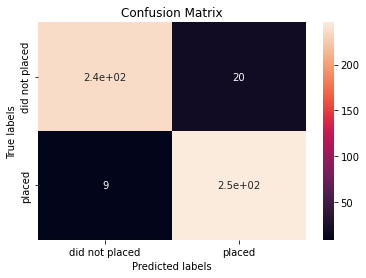

In [111]:
#with Gridsearch
y_predict_lr=lr.predict(x_test)
plot_confusion_matrix(y_test,y_predict_lr)

In [112]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict_lr))

              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94       256
         1.0       0.92      0.96      0.94       255

    accuracy                           0.94       511
   macro avg       0.94      0.94      0.94       511
weighted avg       0.94      0.94      0.94       511



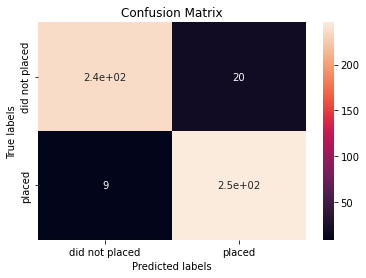

In [113]:
#without Gridsearch
y_predict_lr_cv=logreg_cv.predict(x_test)
plot_confusion_matrix(y_test,y_predict_lr_cv)

In [114]:
print(classification_report(y_test,y_predict_lr_cv))

              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94       256
         1.0       0.92      0.96      0.94       255

    accuracy                           0.94       511
   macro avg       0.94      0.94      0.94       511
weighted avg       0.94      0.94      0.94       511



# Decition Tree/Random Forest

In [115]:
from sklearn.tree import DecisionTreeClassifier

Dec_tree=DecisionTreeClassifier() 
parameters = {'criterion': ['gini', 'entropy'],'splitter':['best', 'random'],'max_depth':[2*n for n in range(1,10)], 'max_features':['auto', 'sqrt'],'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10]}

Dec_tree_cv=GridSearchCV(Dec_tree,parameters,cv=10) 
Dec_tree_cv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [116]:
print("tuned hpyerparameters :(best parameters) ",Dec_tree_cv.best_params_)
print("accuracy :",Dec_tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 16, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}
accuracy : 0.9302521008403362


In [117]:
Dec_tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [118]:
accu.append(Dec_tree.score(x_test,y_test))
methods.append('Decision Tree')
accu_cv.append(Dec_tree_cv.score(x_test,y_test))
methods_cv.append('Decision Tree') 
print(Dec_tree.score(x_test,y_test))
print(Dec_tree_cv.score(x_test,y_test))

0.9980430528375733
0.8571428571428571


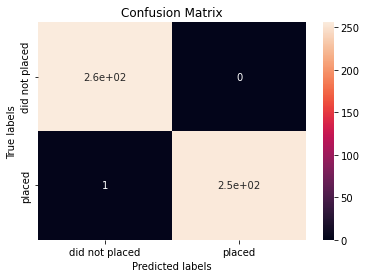

In [119]:
y_predict_Dt=Dec_tree.predict(x_test)
plot_confusion_matrix(y_test,y_predict_Dt)

In [120]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict_Dt))#over fir

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       256
         1.0       1.00      1.00      1.00       255

    accuracy                           1.00       511
   macro avg       1.00      1.00      1.00       511
weighted avg       1.00      1.00      1.00       511



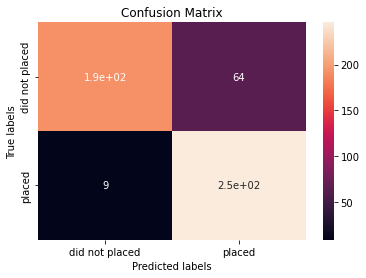

In [121]:
y_predict_Dt_cv=Dec_tree_cv.predict(x_test)
plot_confusion_matrix(y_test,y_predict_Dt_cv)

In [122]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict_Dt_cv))

              precision    recall  f1-score   support

         0.0       0.96      0.75      0.84       256
         1.0       0.79      0.96      0.87       255

    accuracy                           0.86       511
   macro avg       0.87      0.86      0.86       511
weighted avg       0.87      0.86      0.86       511



# Support Vector Machine(SVM)

In [123]:
from sklearn.svm import SVC

parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': (0.5, 1, 1.5)}
svm=SVC()
svm_cv = GridSearchCV(svm, parameters, cv = 10)
svm_cv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': (0.5, 1, 1.5),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [124]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.5, 'kernel': 'linear'}
accuracy : 0.9470588235294117


In [125]:
svm.fit(x_train,y_train)

SVC()

In [126]:
accu.append(svm_cv.score(x_test,y_test))
methods.append('support vector machine')
accu_cv.append(svm_cv.score(x_test,y_test))
methods_cv.append('support vector machine')
print(svm.score(x_test,y_test))
print(svm_cv.score(x_test,y_test))

0.9080234833659491
0.9530332681017613


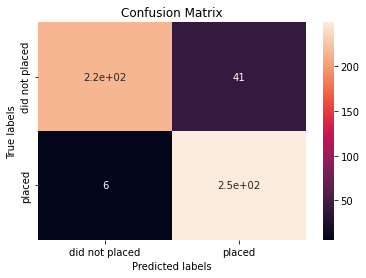

In [127]:
y_predict_svm=svm.predict(x_test)
plot_confusion_matrix(y_test,y_predict_svm)

In [128]:
print(classification_report(y_test,y_predict_svm))

              precision    recall  f1-score   support

         0.0       0.97      0.84      0.90       256
         1.0       0.86      0.98      0.91       255

    accuracy                           0.91       511
   macro avg       0.92      0.91      0.91       511
weighted avg       0.92      0.91      0.91       511



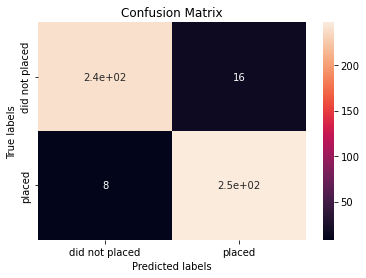

In [129]:
y_predict_svm_cv=svm_cv.predict(x_test)
plot_confusion_matrix(y_test,y_predict_svm_cv)

In [130]:
print(classification_report(y_test,y_predict_svm_cv))

              precision    recall  f1-score   support

         0.0       0.97      0.94      0.95       256
         1.0       0.94      0.97      0.95       255

    accuracy                           0.95       511
   macro avg       0.95      0.95      0.95       511
weighted avg       0.95      0.95      0.95       511



# K Nearest Neighbors

In [131]:
from sklearn.neighbors import KNeighborsClassifier

parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()
knn_cv = GridSearchCV(KNN, parameters, cv = 10)
knn_cv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [132]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.7579831932773109


In [133]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [134]:
accu.append(knn.score(x_test,y_test))
methods.append('KNN')
accu_cv.append(knn_cv.score(x_test,y_test))
methods_cv.append('KNN')
print(knn.score(x_test,y_test))
print(knn_cv.score(x_test,y_test))

0.6340508806262231
0.7710371819960861


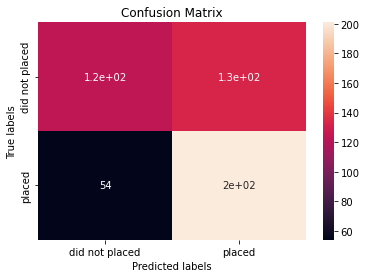

In [135]:
y_predict_knn=knn.predict(x_test)
plot_confusion_matrix(y_test,y_predict_knn)

In [136]:
print(classification_report(y_test,y_predict_knn))

              precision    recall  f1-score   support

         0.0       0.69      0.48      0.57       256
         1.0       0.60      0.79      0.68       255

    accuracy                           0.63       511
   macro avg       0.65      0.63      0.63       511
weighted avg       0.65      0.63      0.63       511



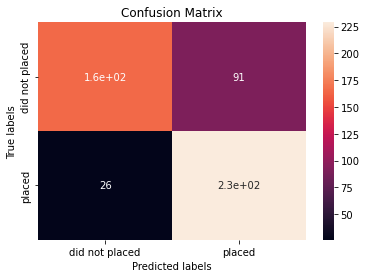

In [137]:
y_predict_knn_cv=knn_cv.predict(x_test)
plot_confusion_matrix(y_test,y_predict_knn_cv)

In [138]:
print(classification_report(y_test,y_predict_knn_cv))

              precision    recall  f1-score   support

         0.0       0.86      0.64      0.74       256
         1.0       0.72      0.90      0.80       255

    accuracy                           0.77       511
   macro avg       0.79      0.77      0.77       511
weighted avg       0.79      0.77      0.77       511



# Find the method performs best:

In [139]:
print(methods)
print(accu)

['logistic regression', 'Decision Tree', 'support vector machine', 'KNN']
[0.9432485322896281, 0.9980430528375733, 0.9530332681017613, 0.6340508806262231]


In [140]:
print(methods_cv)
print(accu_cv)

['logistic regression', 'Decision Tree', 'support vector machine', 'KNN']
[0.9432485322896281, 0.8571428571428571, 0.9530332681017613, 0.7710371819960861]


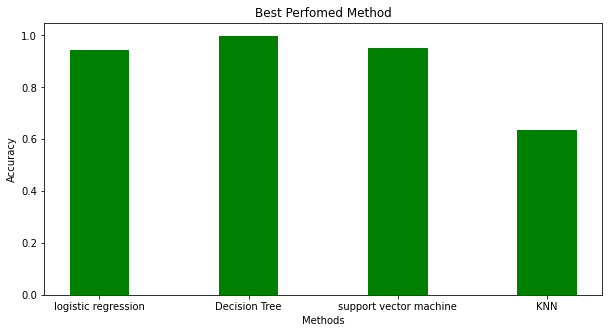

In [141]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(methods, accu, color ='Green',
        width = 0.4)
 
plt.xlabel("Methods")
plt.ylabel("Accuracy")
plt.title("Best Perfomed Method")
plt.show()

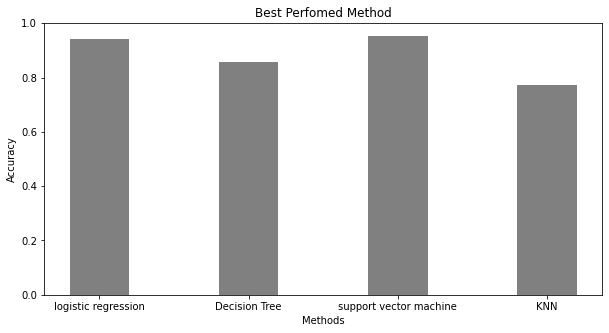

In [142]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(methods_cv, accu_cv, color ='Gray',
        width = 0.4)
 
plt.xlabel("Methods")
plt.ylabel("Accuracy")
plt.title("Best Perfomed Method")
plt.show()

# Reciver Operating Characteristic Curve(ROC Curve)

Text(0.5, 1.0, 'Area Under ROC')

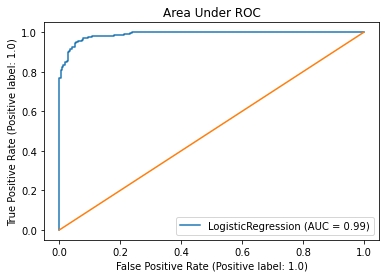

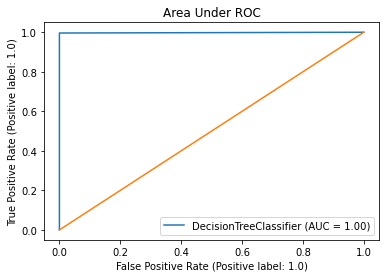

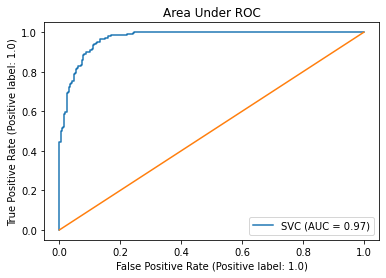

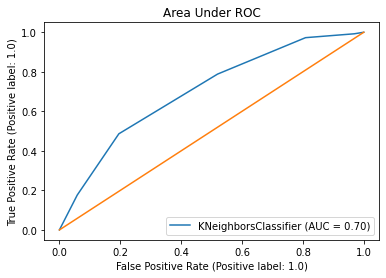

In [147]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(lr,x_test,y_test)
print(plt.plot([0,1],[0,1]))
plt.title('Area Under ROC')

RocCurveDisplay.from_estimator(Dec_tree,x_test,y_test)
print(plt.plot([0,1],[0,1]))
plt.title('Area Under ROC')

RocCurveDisplay.from_estimator(svm,x_test,y_test)
print(plt.plot([0,1],[0,1]))
plt.title('Area Under ROC')

RocCurveDisplay.from_estimator(knn,x_test,y_test)
print(plt.plot([0,1],[0,1]))
plt.title('Area Under ROC')

Text(0.5, 1.0, 'Area Under ROC')

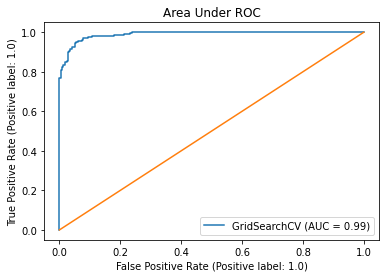

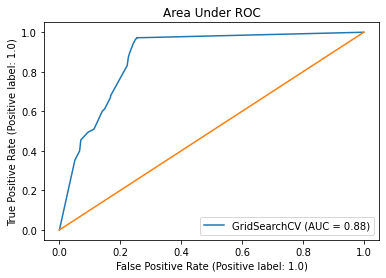

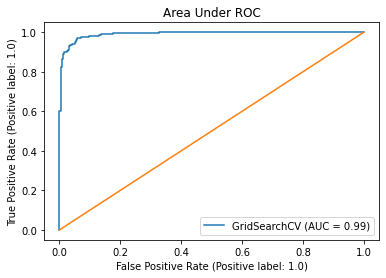

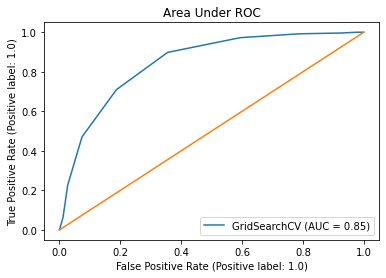

In [150]:
RocCurveDisplay.from_estimator(logreg_cv,x_test,y_test)
print(plt.plot([0,1],[0,1]))
plt.title('Area Under ROC')

RocCurveDisplay.from_estimator(Dec_tree_cv,x_test,y_test)
print(plt.plot([0,1],[0,1]))
plt.title('Area Under ROC')

RocCurveDisplay.from_estimator(svm_cv,x_test,y_test)
print(plt.plot([0,1],[0,1]))
plt.title('Area Under ROC')

RocCurveDisplay.from_estimator(knn_cv,x_test,y_test)
print(plt.plot([0,1],[0,1]))
plt.title('Area Under ROC')

# Best Model: SVM(Grid Search)

# Save Model

In [151]:
import pickle
with open('pathrise_placed.pkl','wb') as f:
    pickle.dump(svm_cv,f)

# Conclusion
Finally, among the 4 machine learning models, the SVM model is chosen due to its accuracy and lower FP compared to other models. Of course, the decision tree model has high accuracy and zero FP, but to avoid over fit, I choose the svm model.